## NYC DEMAND PLOTTING

* by hours of the day with standard deviation
* by days of the week with standard deviation
* by days of the week in hours with standard deviation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science','no-latex'])

In [2]:
df = pd.read_csv('KPI_resultsNYC.csv', index_col=0)

In [3]:
df.Start_time = df.apply(lambda row: pd.Timestamp(row.Start_time), axis=1) #convert "Start_time" to time type

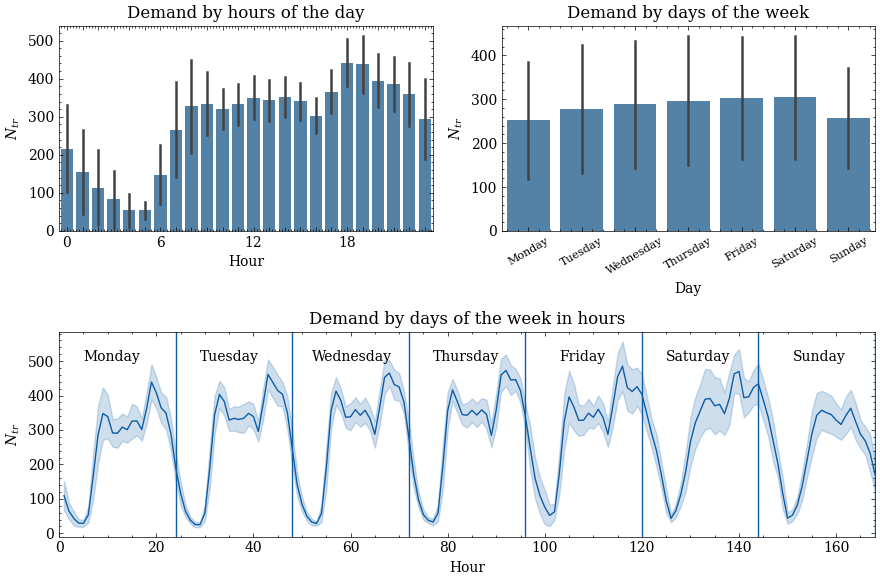

In [22]:
# Setup the subplot2grid Layout
fig = plt.figure(figsize=(9, 6))
ax1 = plt.subplot2grid((2,2), (0,0)) # demand by hours of the day with standard deviation
ax2 = plt.subplot2grid((2,2), (0,1)) # demand by days of the week
ax3 = plt.subplot2grid((2,2), (1,0), colspan=2) # demand by days of the week in hours with standard deviation

ax=ax1
to_plot = df
df['Trips']=df['Demand_size']*2 #the number of trips equals the demand for half an hour multiplied by 2
sns.barplot(data = to_plot, x = df.Start_time.dt.hour, y="Trips", errorbar="sd", ax = ax, color='steelblue')
to_plot.Start_time.dt.dayofweek.unique()
ax1.set_xlabel('Hour') #the hour of the day
ax1.set_ylabel('$N_{tr}$') #the number of trips/hour
ax1.set_title("Demand by hours of the day")
ax1.set_xticklabels( (0,'','','','','',6,'','','','','',12,'','','','','',18,'','','','',''))

ax=ax2
to_plot = df
df['Trips']=df['Demand_size']*2 #the number of trips equals the demand for half an hour multiplied by 2
sns.barplot(data = to_plot, x = df.Start_time.dt.dayofweek, y="Trips", errorbar="sd", ax = ax, color='steelblue')
to_plot.Start_time.dt.dayofweek.unique()
ax2.set_xlabel('Day') #the day of the week
ax2.set_ylabel('$N_{tr}$') #the number of trips/hour
ax2.set_title("Demand by days of the week")
ax2.set_xticklabels( ('Monday', 'Tuesday','Wednesday','Thursday', 'Friday','Saturday', 'Sunday'), rotation=30, fontsize=8)

ax=ax3
df['Trips']=df['Demand_size']*2 #the number of trips equals the demand for half an hour multiplied by 2
df['hour_of_week'] = df.Start_time.dt.dayofweek * 24 + (df.Start_time.dt.hour + 1)
for d in df.shared_discount.unique():
    to_plot = df
    sns.lineplot(data = to_plot, x = 'hour_of_week', y = 'Trips', ax = ax, label = d, legend=False, errorbar ='sd')
ax3.set_xlim(0,168)
ax3.set_xlabel('Hour')
ax3.set_ylabel('$N_{tr}$')
ax3.set_title("Demand by days of the week in hours")
ax3.axvline(x = 24)    # Line on x = 2
ax3.axvline(x = 48)
ax3.axvline(x = 72)
ax3.axvline(x = 96)
ax3.axvline(x = 120)
ax3.axvline(x = 144)
ax3.axvline(x = 168)
# Text annotation at x = 2, y = 1.75           
ax3.text(5,500, "Monday")
ax3.text(29,500, "Tuesday")
ax3.text(52,500, "Wednesday")
ax3.text(77,500, "Thursday")
ax3.text(103,500, "Friday")
ax3.text(125,500, "Saturday")
ax3.text(151,500, "Sunday")
# ax3[i].text(0.02, 0.95, "({})"), fontsize=11, fontweight='bold', va='top')

fig.tight_layout()
plt.savefig('F1.jpg', dpi=600)